# Session 1: SciKit Learn and Linear Regression in Python

This session introduces Sci Kit Learn or `SKLearn` and its workflow for machine learning apploications in Python., in particular how its can be usilised to perform linear regression - with one or more predictor variables. 

SK Learn is an incredibly important library in Python and will it is perhaps overkill here to use it for a OLS RTegression, the workflow is useful to undersand as this will be used across machine learning and forcasting with data. In particular this llobary is commonly used in data science and machine learning so any job in this feild would almost certainly want experience with SK Learn. 

In [13]:
# pip install statsmodels in the terminal 

# Usual python modules
import numpy as np
import pandas as pd

# Sci Kit Learn 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Here by importing from a Python library we can install just a sum module of the full library

# Data Plotting Modules
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

data_url = 'https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv'

df = pd.read_csv(data_url)

# We want to see if we can predict blood glucose with BMI
# Later in the course we'll use the same data to see if other factors can predict diabetes in different ways

# We are going for a linear regression which assumes that as one variable increases, the other variable will
# increase in a linear fashion, as in, with the same gradient, so the relationship will be a straight line, 
# not, for instance, an exponential relationship (such as the intensity of light compared to distance from it).
df

# Here we are using data from thre United States that looks at Diabities and related varaberales.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In Machine Learning processes it is standard to denote the independent or predictor variable(s) with a capital $X$ and the dependant or outcome variables with a lower case $y$. Here we will assign our data tov these two objects so tht it is easier to work with and stopping us from having to index the column each time. 

In [14]:
# X is our observable, our independant variable, the thing that changes we are saying may influence our outcome variable
# We need to reshape our variables to numpy so we can use them in SKLearn, it might seem weird but we do it every time so get used to it!
X = df['BMI'].to_numpy().reshape(-1, 1) # NP arrarys are similar to lists but they're faster to run, and more strict


# y is our independent varible, the thing we think is changed by the other variable, we assume/test for a caqusal relationship between the two
y = df['Glucose'].to_numpy().reshape(-1, 1)


# the numpy function reshap(-1,1) shifts our array of data into one column and as many rows that are needed (like a list)

In [15]:
# For ML we need to give the model something to LEARN with, and then some data to test the model with to see how good it is.
# We need to split our X and y into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

We split teh data so that we can use some of our data to create our model ans predictions and then we can use this on the unused data to test. This allows us to tes wheather the predictions created are accurate at predicting new data. If we simply used all of the data to fit the model then teh model might be over fit to our data, and not be a good prediction for new data. 

A standard way to do this is to split your data 70/30, using 70% of the data to fit your model and the other 30% to test wheather the predictions accuratly map onto the (unseen) data. As this is so common in machine learning functions like `train_test_slpit()` tke care of this, randomly splitting the data for both $X$ and $y$ into tesing and training. 

In [16]:
# Next we make a variable that contains the linear regression information, but it's not 
# like a normal variable, it's technically a 'Class' object that contains lots of types of info, and methods related to it, 
# but best to just think of it as a variable with different info stores in it.

regr = linear_model.LinearRegression()

# Now we will give it our training data and it'll work out a model that best fits the data.
# There's lots of different ways of building a linear regression model,
# The SKLearn regression uses an OLS model, which is one of the simplest and most common.
# It finds a line that fits the data best by drawing one such that, if we add and square the
# distance between every point and the line, it has the shortest total squared distance.

regr.fit(X_train, y_train)

# We have now built our model and we can predict what our y values will be for a given X (so blood glucose for a given BMI)
y_pred = regr.predict(X_test)

In [17]:
# The coefficients

# We have only used one variable so we only get one coefficient, it tells us the degree to which
# the X influences the y, in the most simple terms for our example it is the gradient of the line.
# If we had more variables we'd have more coefficients allowing us to make more complex predicitons.
print("Coefficients: \n", regr.coef_)


# The mean squared error

# This is a measure of the quality of the estimator, a good MSE is closer to 0 but there is no 'acceptable' 
# MSE, more we want to select variables, and sets of variables htat improve it.
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


# The coefficient of determination: 1 is perfect prediction, we can think of it as how good our 
# correlation is. We have a value of 0.05 which is not good. 0.7 is around the starting point for a good corellation.
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))  # %.2f is rounding it to 2 significant figures

Coefficients: 
 [[0.88558366]]
Mean squared error: 1070.59
Coefficient of determination: 0.05


>Here coefficientnt is feature importance, or how much weight the feature provides in the analysis, magnitude of feature importance is relative. Here we have only one value so we can't do much with relative importance.


> Mean Squared Error is the average of the squares of our errors, lower values mean lower error, lower values mean the forecast is closer to the actual values, lower means better fit. Again, we would use this to compare it to MSE in another model to see which model does best.


> R squared a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit). It says how many of the predictors explain the variation in y.

In [18]:
mod = sm.OLS(y_pred,X_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

x1    1.088842e-167
Name: P>|t|, dtype: float64

The p value is a number, calculated from a statistical test, that describes how likely you are to have found a particular set of observations if the null hypothesis were true. P values are used in hypothesis testing to help decide whether to reject the null hypothesis. The smaller the p value, the more likely you are to reject the null hypothesis. In this case the null hypothesis is that BMI doesn't predict blood glucose. The p value is a proportion: if your p value is 0.05, that means that 5% of the time you would see a test statistic at least as extreme as the one you found if the null hypothesis was true. 1.088842e-167 is a tiny tiny number, so is strong evidence that BMI is correlated with glucose.

# Plotting Regression Results 

We can plot our regression results and our predictions onto a chart to provide a visual illustation of how we have fit our model and the predictions the regression has made. 

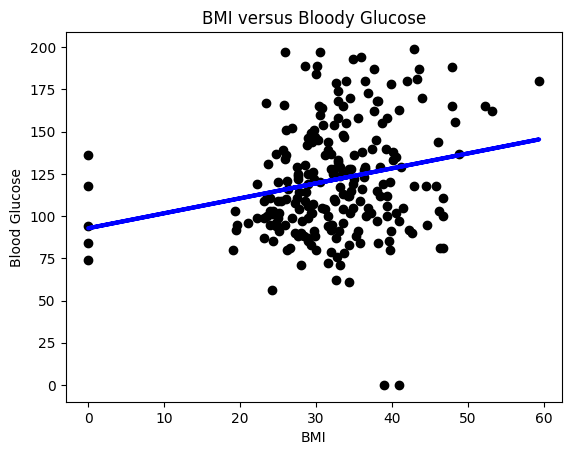

In [19]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel('BMI')
plt.ylabel('Blood Glucose')

plt.title('BMI versus Bloody Glucose')

plt.show()

# Predicting Unobserved Data
We can use the results of the OLS regression to predict what the values would be for unobserved data. Here we are generating predictions for unobserved BMI's using the model.

In [20]:
# We are gonna add new data points based on our prediciton model so we can draw an extended
# line on our plot to predict further BMI/GLucose values
prediction_df = pd.DataFrame()
prediction_df['BMI'] = np.arange(60, 70)
prediction_df['Glucose'] = regr.predict(np.arange(60, 70).reshape(-1, 1))

prediction_df

,BMI,Glucose
0,60,145.940854
1,61,146.826438
2,62,147.712022
3,63,148.597605
4,64,149.483189
5,65,150.368773
6,66,151.254356
7,67,152.139940
8,68,153.025524
9,69,153.911107


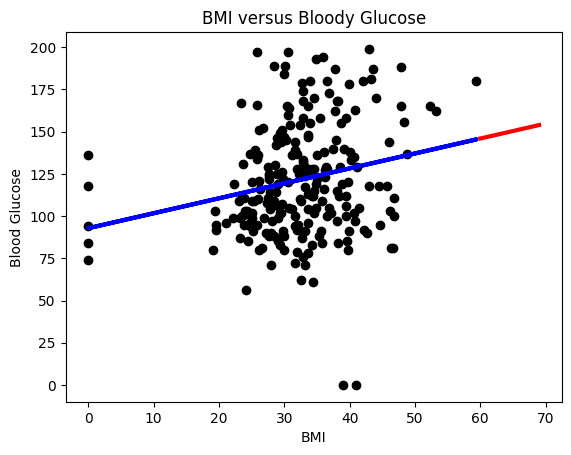

In [21]:
# Now lets draw the new plot!

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel('BMI')
plt.ylabel('Blood Glucose')

plt.title('BMI versus Bloody Glucose')

plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color="red", linewidth=3)
plt.show()

Here we can see that our model predicts the association between BMI and Blood Glocose to continue, duggesting that the blood glocuse level woudl continue to rise on the same trend for higher levels of BMI.

[[ 81.75429506 103.85737512]
 [  0.54812428   1.22304303]]


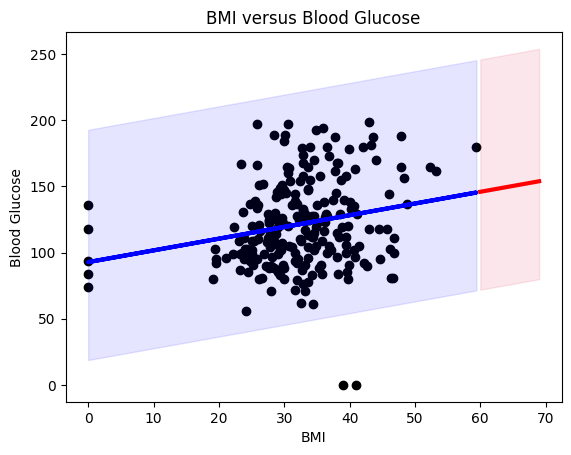

In [22]:
import statsmodels.api as sm 
# this must have been pip installed in the terminal first 
# sk does not calculate condidence intervals however the statsmodels does
# we can run the ols regression in sm imnstead

alpha = 0.05 # 95% confidence interval

lr = sm.OLS(y_train, sm.add_constant(X_train)).fit() # format is slightly different 
conf_interval = lr.conf_int(alpha)

print(conf_interval)


# Make the confidence intevals into a dataframe 
# add the x values and predicted y 
# the ravel function shift the format from a 1d column to a list so that it works in the dataframe 

lr_df = pd.DataFrame({'BMI':X_test.ravel(),
                      'Glucose':y_pred.ravel()})

lr_df = lr_df.sort_values('BMI')




plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

# plt.fill_between(X_test.ravel(), (y_pred.ravel() - 74), (y_pred.ravel() + 100), alpha=.1, color='blue')
plt.fill_between(lr_df['BMI'], (lr_df['Glucose'] - 74), (lr_df['Glucose']  + 100), alpha=.1, color='blue')

plt.xlabel('BMI')
plt.ylabel('Blood Glucose')

plt.title('BMI versus Blood Glucose')

plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color="red", linewidth=3)

plt.fill_between(prediction_df['BMI'], (prediction_df['Glucose'] - 74), (prediction_df['Glucose'] + 100), alpha=.1, color='crimson')
plt.show()

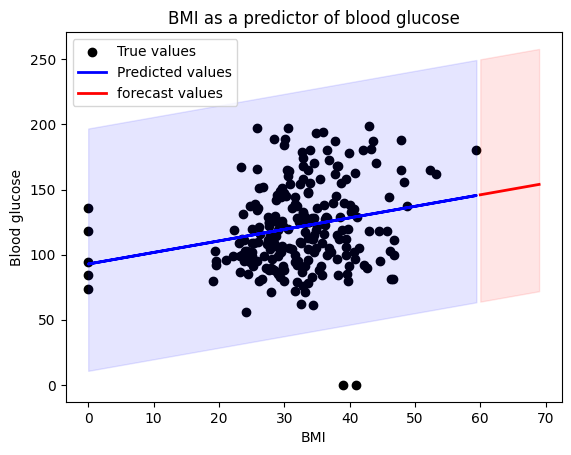

In [23]:
import statsmodels.api as sm
 
alpha = 0.05
 
lr = sm.OLS(y_train, sm.add_constant(X_train)).fit()
conf_interval = lr.conf_int(alpha)
 
# print(conf_interval)
 
lr_df = pd.DataFrame(
    {'BMI':X_test.ravel(),
     'Glucose':y_pred.ravel()}
)
 
lr_df = lr_df.sort_values('BMI')
 
lr_df['Glucose lower CI'] = lr_df['Glucose'] - 82
lr_df['Glucose upper CI'] = lr_df['Glucose'] +104
 
plt.scatter(X_test, y_test, color='black', label='True values')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted values')
plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color='red', linewidth=2, label='forecast values')
 
plt.xlabel('BMI')
plt.ylabel('Blood glucose')
 
plt.legend(loc="upper left")
 
plt.title('BMI as a predictor of blood glucose')
 
plt.fill_between(lr_df['BMI'], lr_df['Glucose lower CI'], lr_df['Glucose upper CI'], color='blue', alpha=.1)
plt.fill_between(prediction_df['BMI'], (prediction_df['Glucose'] - 82), (prediction_df['Glucose'] + 104), color='red', alpha=.1)
 
plt.show()
 

# Multiple Linear Regression

If we want to look at the effect of multiple predictor variables at once we can simply add these to our regression to craete a muyltiple linear regression. Here we simply assign both columns to $X$. This means that unlike above where $X$ was a list or a vector, here it is now a $2 \times n$ matrix including both predictors. 

In [24]:
# Multiple linear regression predicitons

# Multiple regression - we won't plot this as we'd need a 3d plot! But we can still make predicitons

# We don't have to reshape it to an array now, the two pandas series together are the right shape!
X = df[['BMI', 'BloodPressure']] 
y = list(df['Glucose'])#.to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

mod = sm.OLS(y_pred,X_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

regr.predict(pd.DataFrame([{'BMI':60,
                     'BloodPressure':100}]))

Coefficients: 
 [0.82888029 0.09844378]
Mean squared error: 1053.80
Coefficient of determination: 0.07
BMI              1.195669e-34
BloodPressure    4.676373e-23
Name: P>|t|, dtype: float64


array([147.40054992])